In [1]:
import pandas as pd

# Load with date parsing
orders = pd.read_csv("customer_orders.csv", parse_dates=["date"])

# Preview the first 5 rows
orders.head()


,date,day_of_week,total_orders,is_holiday,temperature
0,2024-01-01,Monday,86,0,24
1,2024-01-02,Tuesday,100,0,27
2,2024-01-03,Wednesday,78,0,23
3,2024-01-04,Thursday,106,0,27
4,2024-01-05,Friday,116,0,33


In [2]:
# Basic info about data types and nulls
orders.info()

# Statistical summary
orders.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          90 non-null     datetime64[ns]
 1   day_of_week   90 non-null     object        
 2   total_orders  90 non-null     int64         
 3   is_holiday    90 non-null     int64         
 4   temperature   90 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 3.6+ KB


,date,total_orders,is_holiday,temperature
count,90,90.000000,90.000000,90.000000
mean,2024-02-14 12:00:00,104.600000,0.022222,25.066667
min,2024-01-01 00:00:00,74.000000,0.000000,14.000000
25%,2024-01-23 06:00:00,95.000000,0.000000,22.000000
50%,2024-02-14 12:00:00,102.000000,0.000000,24.500000
75%,2024-03-07 18:00:00,114.000000,0.000000,27.000000
max,2024-03-30 00:00:00,147.000000,1.000000,41.000000
std,NaN,15.931595,0.148231,4.953265


In [3]:
orders.isnull().sum()


,0
date,0
day_of_week,0
total_orders,0
is_holiday,0
temperature,0


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


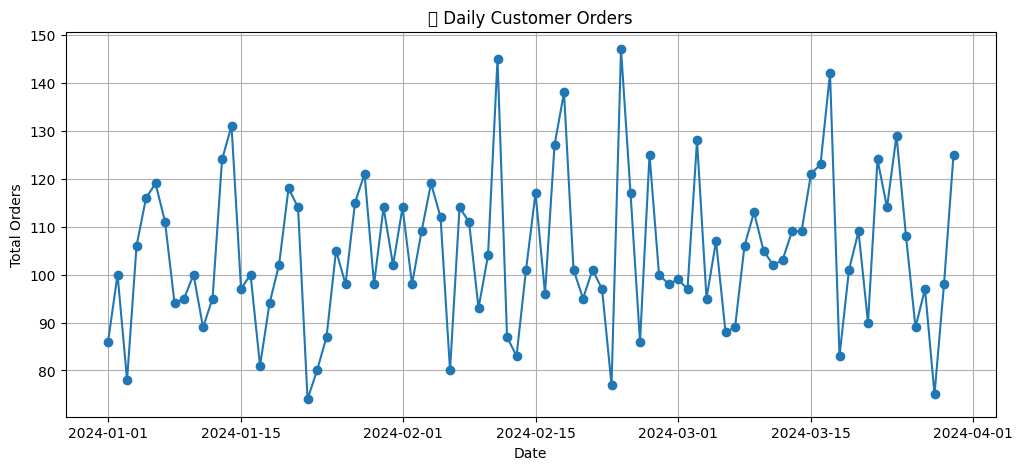

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(orders['date'], orders['total_orders'], marker='o')
plt.title('📈 Daily Customer Orders')
plt.xlabel('Date')
plt.ylabel('Total Orders')
plt.grid(True)
plt.show()


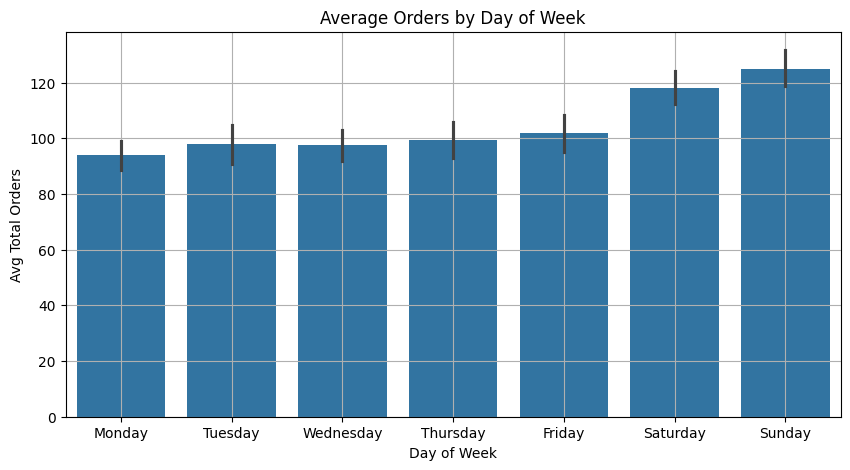

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(data=orders, x='day_of_week', y='total_orders', estimator='mean', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Orders by Day of Week')
plt.ylabel('Avg Total Orders')
plt.xlabel('Day of Week')
plt.grid(True)
plt.show()


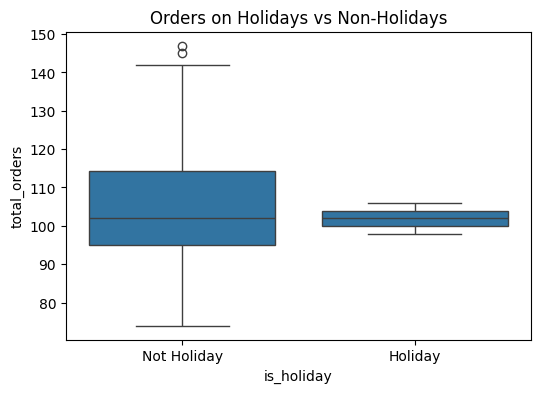

In [6]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=orders, x='is_holiday', y='total_orders')
plt.xticks([0, 1], ['Not Holiday', 'Holiday'])
plt.title('Orders on Holidays vs Non-Holidays')
plt.show()


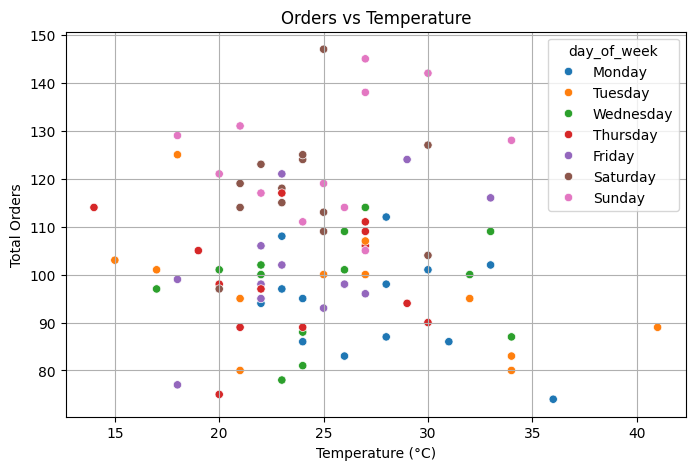

In [7]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=orders, x='temperature', y='total_orders', hue='day_of_week')
plt.title('Orders vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Total Orders')
plt.grid(True)
plt.show()


In [8]:
orders[['total_orders', 'temperature', 'is_holiday']].corr()


,total_orders,temperature,is_holiday
total_orders,1.000000,-0.085658,-0.024741
temperature,-0.085658,1.000000,-0.032647
is_holiday,-0.024741,-0.032647,1.000000


<Axes: title={'center': 'Daily Orders Time Series'}, xlabel='date'>

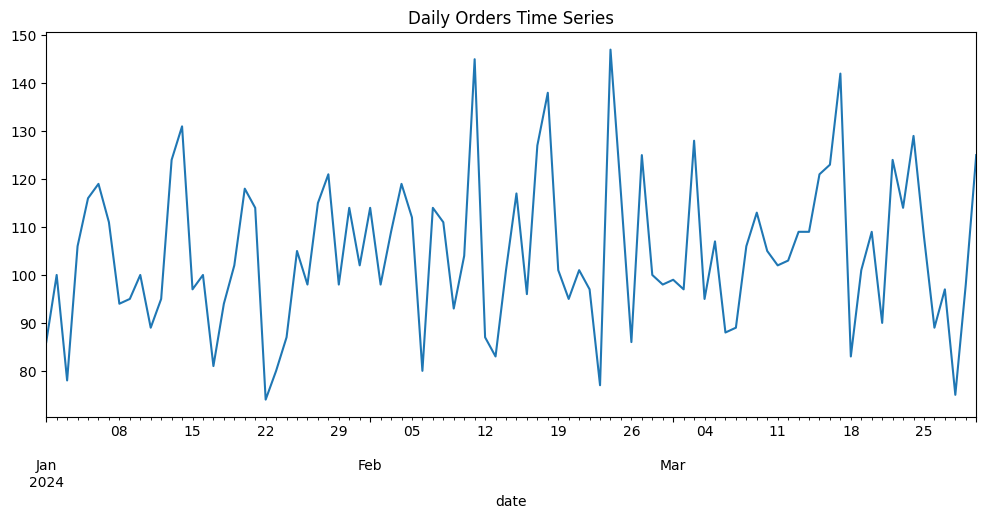

In [9]:
# Set 'date' as index
orders_ts = orders.set_index('date')

# Keep only the target column
daily_orders = orders_ts['total_orders'].asfreq('D')  # ensures it's daily frequency

# Visual check
daily_orders.plot(figsize=(12, 5), title='Daily Orders Time Series')


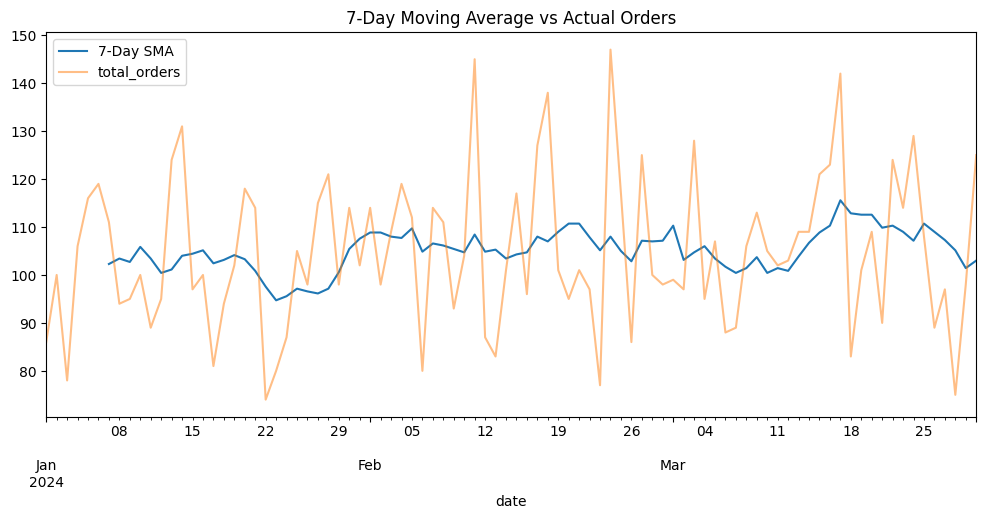

In [10]:
# 7-day rolling average
daily_orders.rolling(window=7).mean().plot(figsize=(12, 5), label='7-Day SMA')
daily_orders.plot(alpha=0.5)
plt.title("7-Day Moving Average vs Actual Orders")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

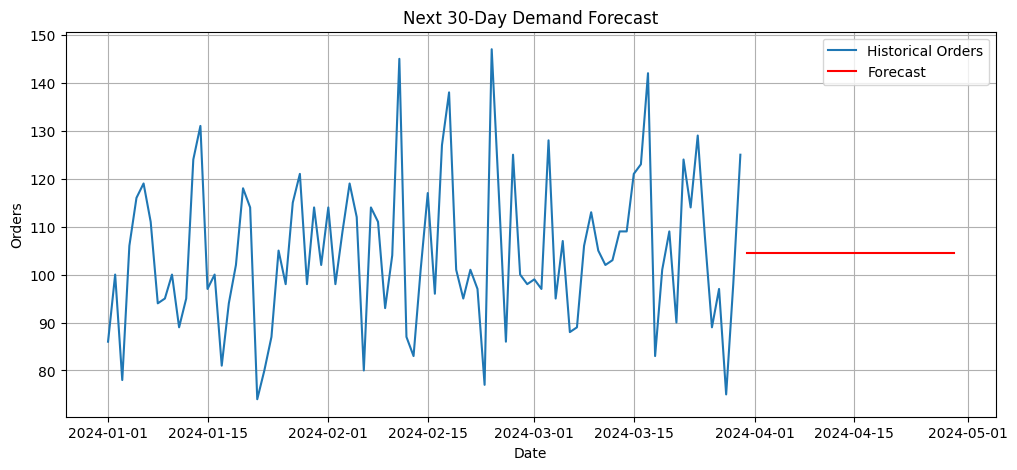

In [11]:
from pmdarima import auto_arima

model = auto_arima(daily_orders, seasonal=False, stepwise=True, suppress_warnings=True)

n_days = 30
forecast = model.predict(n_periods=n_days)

future_dates = pd.date_range(start=daily_orders.index[-1] + pd.Timedelta(days=1), periods=n_days)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(daily_orders, label='Historical Orders')
plt.plot(future_dates, forecast, label='Forecast', color='red')
plt.title("Next 30-Day Demand Forecast")
plt.xlabel("Date")
plt.ylabel("Orders")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# Upload again if not already done
from google.colab import files
uploaded = files.upload()

Saving ingredients.csv to ingredients.csv


In [13]:
# Load ingredient mapping
ingredients = pd.read_csv("ingredients.csv")
ingredients.head()


,menu_item,ingredient,quantity_per_order_unit
0,Pizza,Cheese,0.2
1,Pizza,Flour,0.3
2,Burger,Buns,1.0
3,Burger,Patty,1.0
4,Salad,Lettuce,0.5


In [17]:
# Create forecast DataFrame
forecast_df = pd.DataFrame({
    'date': future_dates,
    'total_orders': forecast
})

# Split into menu item orders
forecast_df['Pizza_orders'] = forecast_df['total_orders'] * 0.4
forecast_df['Burger_orders'] = forecast_df['total_orders'] * 0.35
forecast_df['Salad_orders'] = forecast_df['total_orders'] * 0.25


In [16]:
# Merge menu item + quantity mapping
menu_items = forecast_df[['date', 'Pizza_orders', 'Burger_orders', 'Salad_orders']]
menu_items = menu_items.melt(id_vars='date', var_name='menu_item', value_name='orders')
menu_items['menu_item'] = menu_items['menu_item'].str.replace('_orders', '')

# Merge with ingredients table
merged = pd.merge(menu_items, ingredients, on='menu_item')

# Calculate required ingredient quantity per day
merged['ingredient_qty'] = merged['orders'] * merged['quantity_per_order_unit']


In [18]:
# Final table: total ingredient per day
inventory_plan = merged.groupby(['date', 'ingredient'])['ingredient_qty'].sum().reset_index()

# Preview the plan
inventory_plan.head(10)


,date,ingredient,ingredient_qty
0,2024-03-31,Buns,36.610
1,2024-03-31,Cheese,8.368
2,2024-03-31,Dressing,5.230
3,2024-03-31,Flour,12.552
4,2024-03-31,Lettuce,13.075
5,2024-03-31,Patty,36.610
6,2024-04-01,Buns,36.610
7,2024-04-01,Cheese,8.368
8,2024-04-01,Dressing,5.230
9,2024-04-01,Flour,12.552


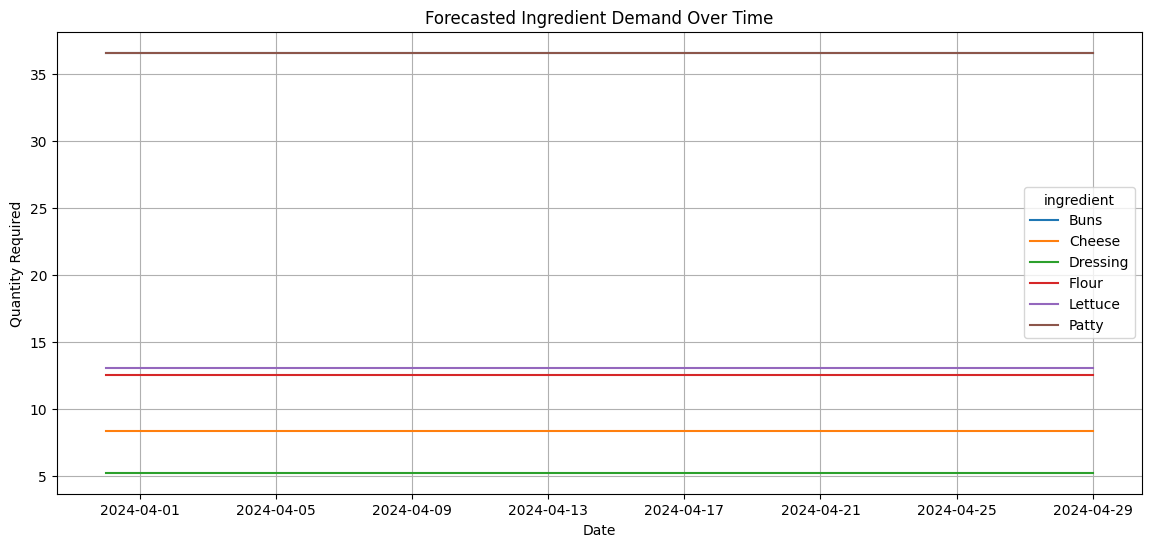

In [19]:
import seaborn as sns
plt.figure(figsize=(14,6))
sns.lineplot(data=inventory_plan, x='date', y='ingredient_qty', hue='ingredient')
plt.title("Forecasted Ingredient Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Quantity Required")
plt.grid(True)
plt.show()
